Téléchargement du dataset depuis Kaggle...
Using Colab cache for faster access to the 'diamonds-characteristics-and-pricing-analysis' dataset.
Chemin du dataset : /kaggle/input/diamonds-characteristics-and-pricing-analysis

Aperçu des données :
   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335

Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   c

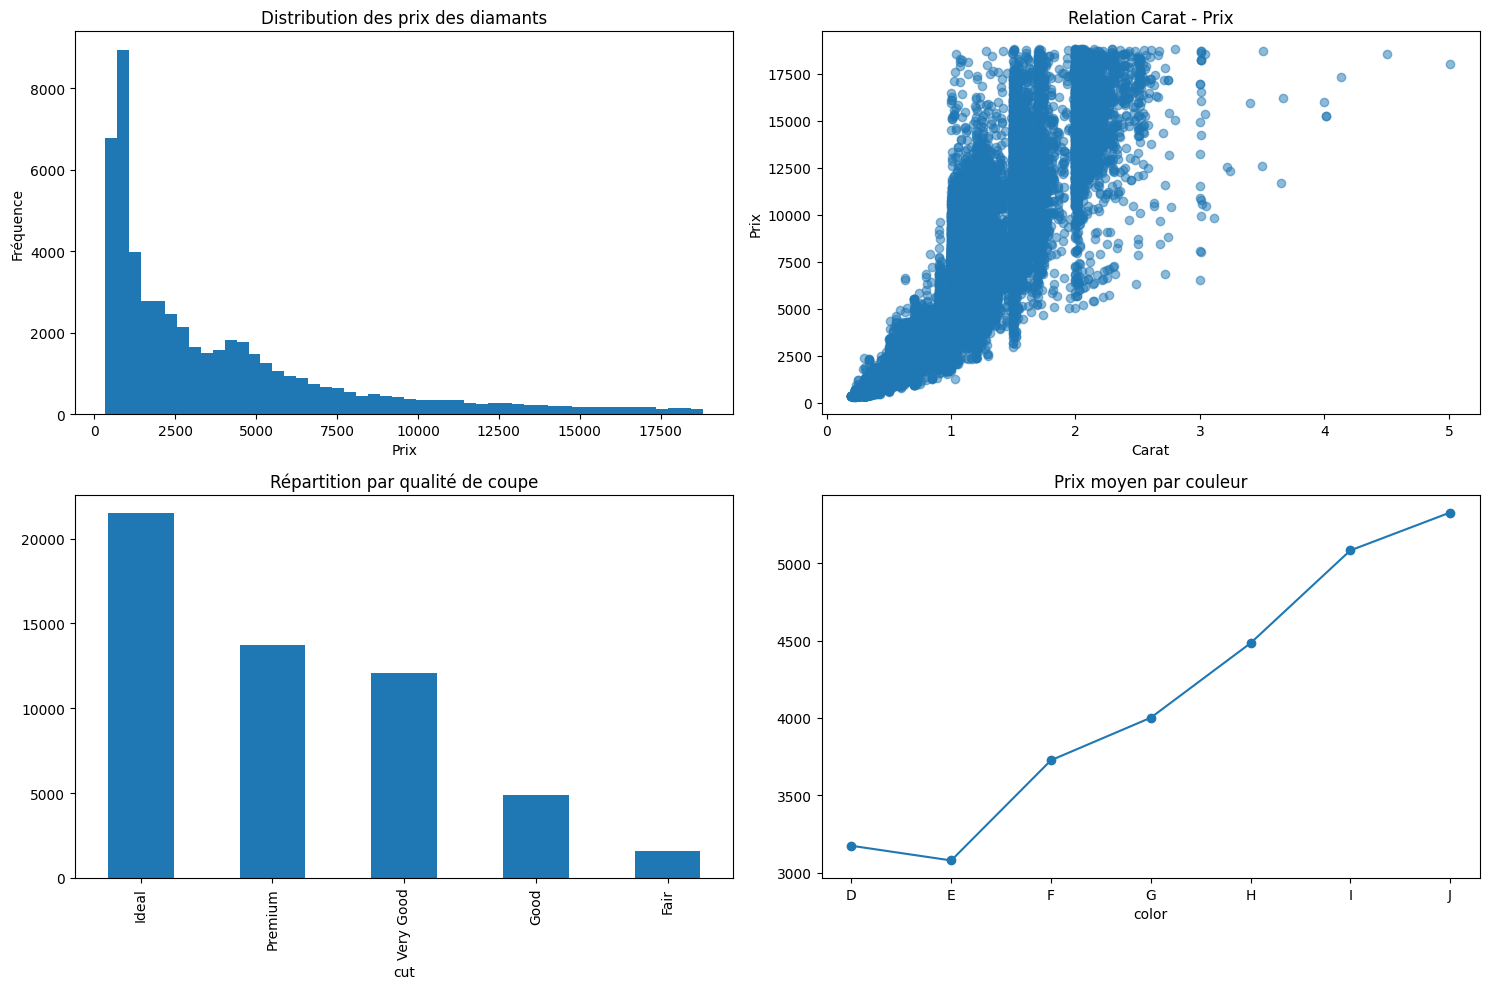


--- Indicateurs Clés ---
Nombre total d'observations : 53794
Prix moyen : 3933.07
Prix max : 18823
Carat moyen : 0.80


In [3]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

# ================================
# 1. Téléchargement du Dataset
# ================================
print("Téléchargement du dataset depuis Kaggle...")
path = kagglehub.dataset_download("zahranusrat/diamonds-characteristics-and-pricing-analysis")
print("Chemin du dataset :", path)


# ================================
# 2. Chargement des données
# ================================
file_path = f"{path}/diamonds.csv"
df = pd.read_csv(file_path)


print("\nAperçu des données :")
print(df.head())


print("\nStructure du dataset :")
print(df.info())


# ================================
# 3. Nettoyage des données
# ================================


# Suppression des doublons
df.drop_duplicates(inplace=True)


# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


# Suppression des lignes incohérentes
df = df[df['price'] > 0]
df = df[df['carat'] > 0]


# ================================
# 4. Statistiques descriptives
# ================================
print("\nStatistiques descriptives :")
print(df.describe())


# ================================
# 5. Visualisations
# ================================
plt.figure(figsize=(15, 10))


# Distribution des prix
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=50)
plt.title("Distribution des prix des diamants")
plt.xlabel("Prix")
plt.ylabel("Fréquence")


# Relation carat / prix
plt.subplot(2, 2, 2)
plt.scatter(df['carat'], df['price'], alpha=0.5)
plt.title("Relation Carat - Prix")
plt.xlabel("Carat")
plt.ylabel("Prix")


# Répartition par cut
plt.subplot(2, 2, 3)
df['cut'].value_counts().plot(kind='bar')
plt.title("Répartition par qualité de coupe")


# Prix moyen par couleur
plt.subplot(2, 2, 4)
df.groupby('color')['price'].mean().plot(kind='line', marker='o')
plt.title("Prix moyen par couleur")


plt.tight_layout()
plt.show()


# ================================
# 6. Indicateurs Clés
# ================================
print("\n--- Indicateurs Clés ---")
print(f"Nombre total d'observations : {len(df)}")
print(f"Prix moyen : {df['price'].mean():.2f}")
print(f"Prix max : {df['price'].max()}")
print(f"Carat moyen : {df['carat'].mean():.2f}")